In [2]:
# HR Analytics – Employee Attrition Prediction

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# 2. Load Dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#3. Data Collection
# Check data shape and types
print(df.shape)
print(df.dtypes)

# Drop columns that are identifiers or not useful for attrition analysis
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

# Ensuring data confidentiality and ethical handling (not shown in code but must be respected in usage and storage)

(1470, 35)
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWork

Attrition
No     1233
Yes     237
Name: count, dtype: int64


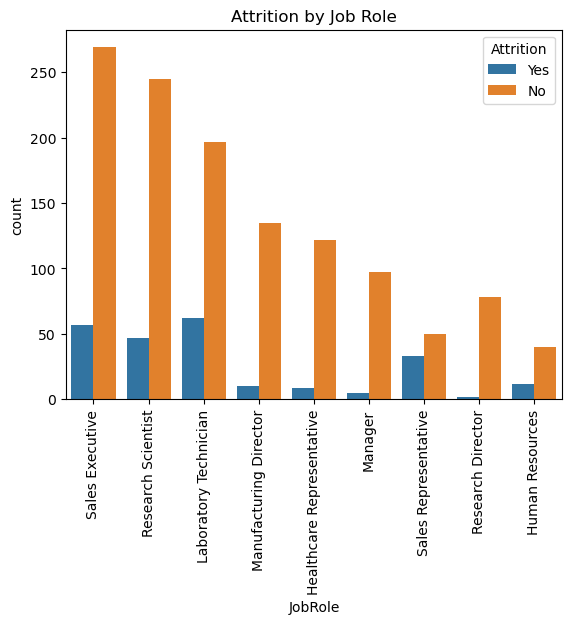

In [8]:
#4. Data Exploration
# Count attrition values
print(df['Attrition'].value_counts())

# Check correlations with numerical data
df.describe()

# Trends: Experience, Salary, Job Role
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=90)
plt.title('Attrition by Job Role')
plt.show()

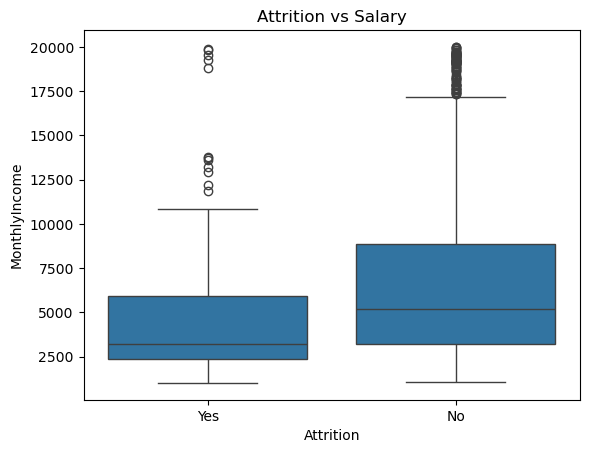

In [10]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition vs Salary')
plt.show()

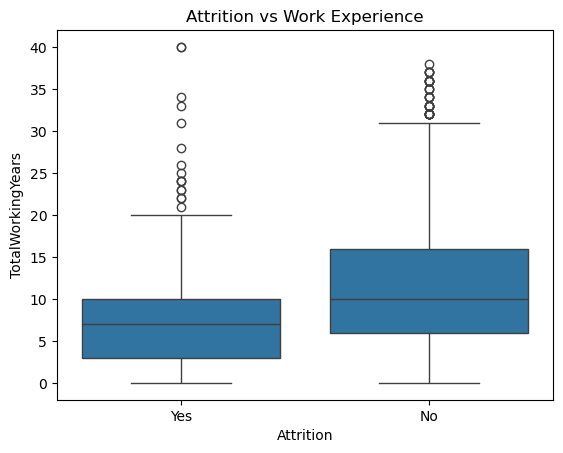

In [12]:
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('Attrition vs Work Experience')
plt.show()

In [22]:
#5. Data Preprocessing
# Handle missing values (if any)
print(df.isnull().sum())  # Should be 0 for this dataset

# Convert categorical columns to numeric
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


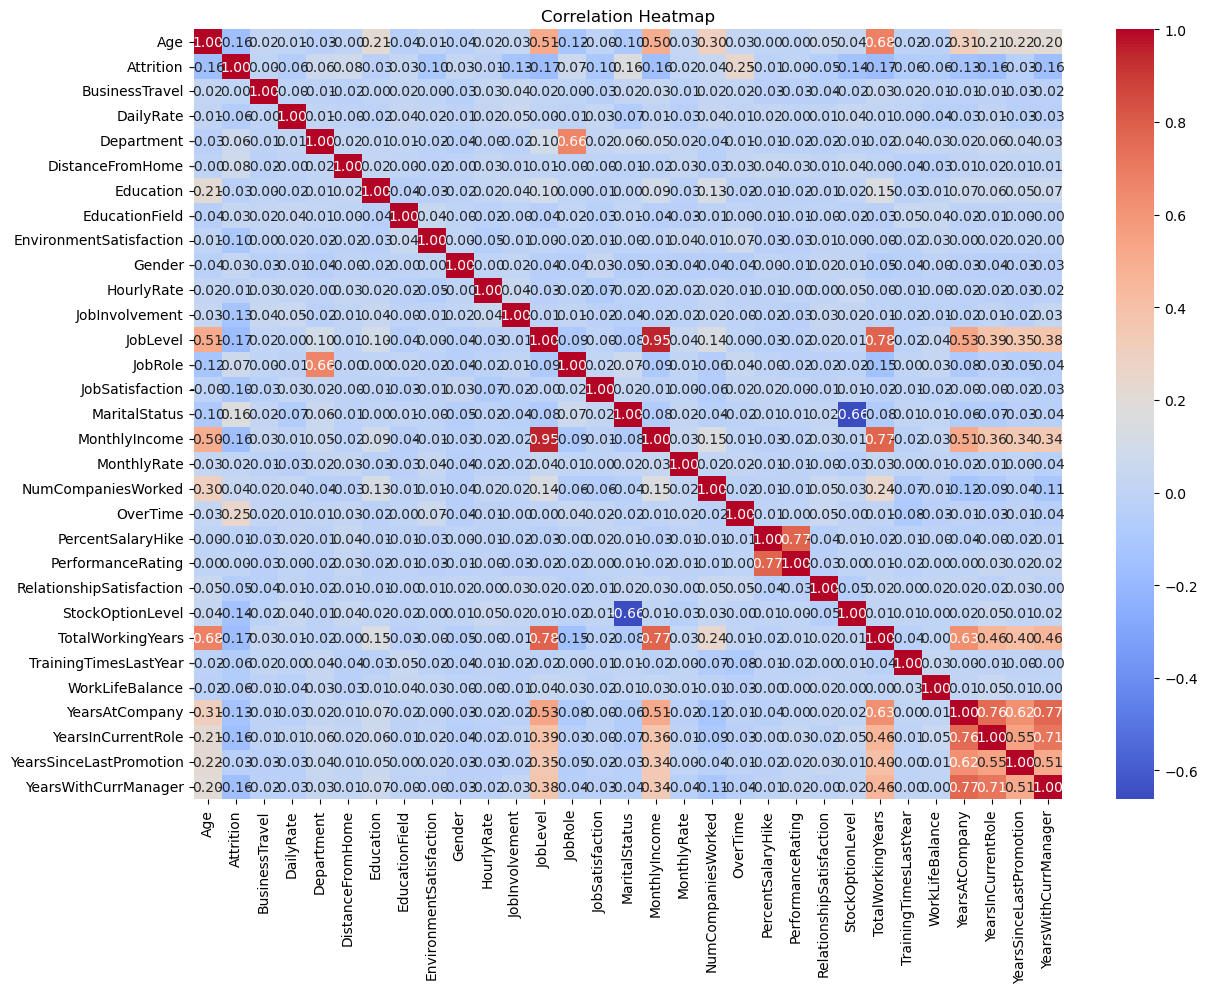

In [20]:
#6. Exploratory Data Analysis(EDA)
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

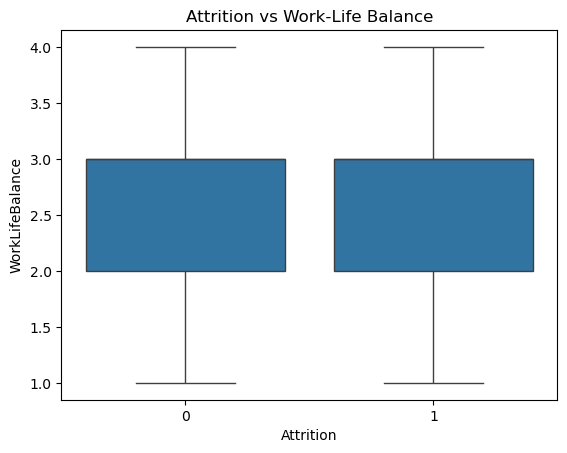

In [24]:
# Focused patterns
sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance')
plt.title('Attrition vs Work-Life Balance')
plt.show()

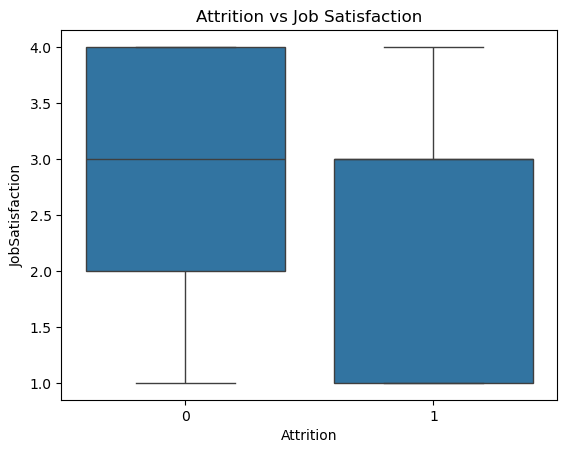

In [26]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Attrition vs Job Satisfaction')
plt.show()

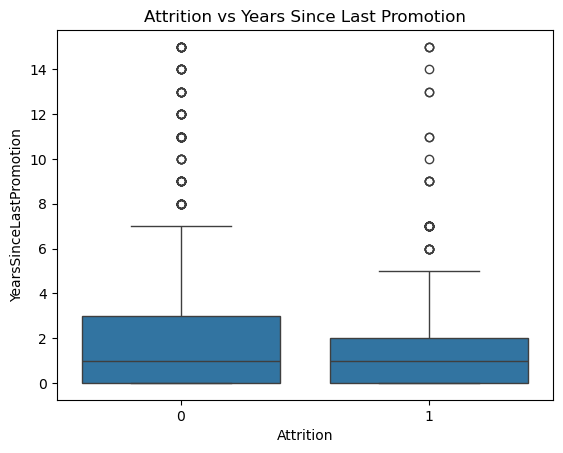

In [28]:
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion')
plt.title('Attrition vs Years Since Last Promotion')
plt.show()

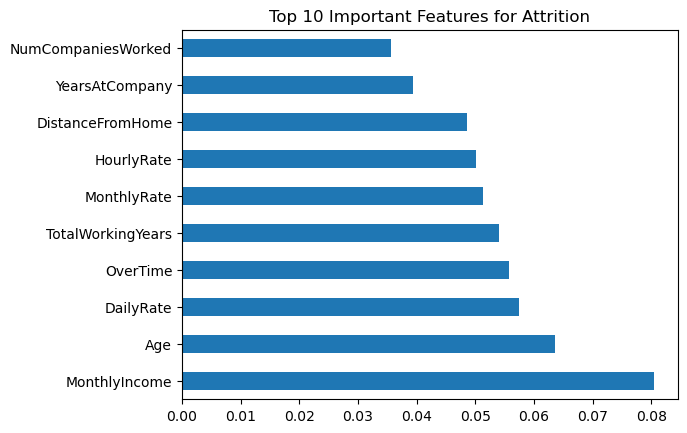

Selected features shape: (1470, 15)


C:\Users\anush\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [36]:
#7. Feature Selection
# Define X and y
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features for Attrition")
plt.show()

# Select top features automatically
selector = SelectFromModel(rf, threshold="median", prefit=True)
X_selected = selector.transform(X)
print("Selected features shape:", X_selected.shape)

In [38]:
#8. Conclusion
print("Key insights:")
print("- High attrition observed among certain job roles.")
print("- Lower monthly income and poor work-life balance correlate with higher attrition.")
print("- Job satisfaction and career progression (promotions) are significant predictors.")

print("\nHR Policy Recommendations:")
print("- Improve work-life balance for employees.")
print("- Recognize and promote deserving employees more frequently.")
print("- Review compensation structure for underpaid roles.")

Key insights:
- High attrition observed among certain job roles.
- Lower monthly income and poor work-life balance correlate with higher attrition.
- Job satisfaction and career progression (promotions) are significant predictors.

HR Policy Recommendations:
- Improve work-life balance for employees.
- Recognize and promote deserving employees more frequently.
- Review compensation structure for underpaid roles.
